<a href="https://colab.research.google.com/github/vaquejano/robo_V1UEM/blob/main/Detec%C3%A7%C3%A3o_cor_amarela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#bibliotecas

import cv2 as cv
from google.colab import files
import numpy as np #biblioteca para contas matematicas
import matplotlib.pyplot as plt #biblioteca para exibir a imagem no colab pois foi desabilitado o opencv


In [ ]:
#carrega imagemsegue_faixa.jpg

upload = files.upload()


Saving 12.png to 12.png


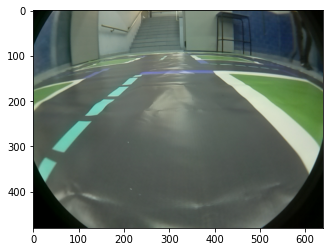

In [ ]:
#preparação da imagem
imagem = (r"12.png") 
img_cv = cv.imread(imagem) 
plt.imshow(img_cv) 

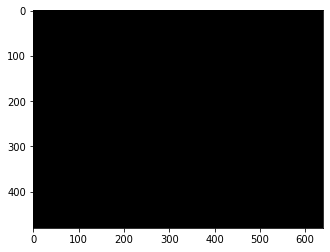

In [ ]:
mask = np.zeros_like(img_cv)
h = 480
w = 640
plt.imshow(mask)


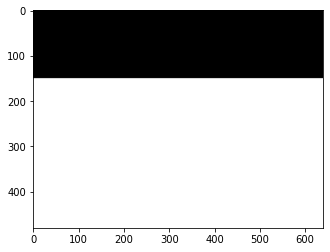

In [ ]:
#Gerar a Mascara - o trapezio amarelo
pts = np.array([[0,480],[0,150],[680,150],[680,480]], dtype=np.int32) # P1, P2, P3, P4
mask_fillpoly = mask #preencher o poligono
masked_filled = cv.fillPoly(mask_fillpoly, [pts], (255, 255, 255)) #pega a mascara, os pontos e preenche de amarelo
plt.imshow(masked_filled, cmap = 'gray')

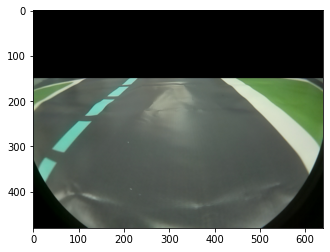

In [ ]:
masked_image = cv.bitwise_and(img_cv, masked_filled)
plt.imshow(masked_image)

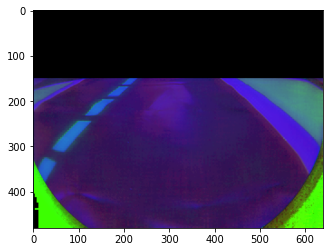

In [ ]:
#preparação da imagem
#imagem = (r"masked_image") 
#imagem = cv.imread(imagem)
#plt.imshow(imagem)
img_amarelo = cv.cvtColor(masked_image, cv.COLOR_BGR2HSV) 
plt.imshow(img_amarelo) 

24
374
611
359


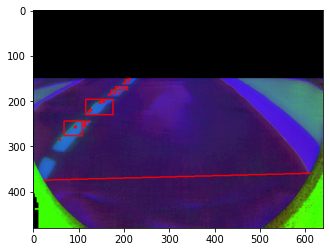

In [ ]:


low = np.array([25, 90, 90])
high = np.array([36, 255, 255])
mask = cv.inRange(img_amarelo, low, high)
res = cv.bitwise_and(img_amarelo,img_amarelo, mask= mask)

contours, _ = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda x:cv.contourArea(x), reverse=True)
menor_x = 600
menor_y = 0

maior_x = 0
maior_y = 400

for cnt in contours:
  (x, y, w, h) = cv.boundingRect(cnt)
  cv.rectangle(img_amarelo, (x, y), (x+w, y+h), (255,0, 0), 2)
  if menor_x > x:
     menor_x = x
     menor_y = y
  if maior_x < x:
     maior_x = x
     maior_y = y

print(menor_x)
print(menor_y)
print(maior_x)
print(maior_y)
cv.line(img_amarelo, (menor_x,menor_y), (maior_x, maior_y), (255,0,0), 2) 

plt.imshow(img_amarelo)

In [ ]:
print (type(contours))

<class 'list'>


In [ ]:
l1 = [1,2,3]
l2 = [3,2,5]
for i in l1:
    for j in l2:
        if(i<j):
            print(i)
            break

print(contours[1])

1
2
3
[[[ 96 244]]

 [[ 96 247]]

 [[ 95 248]]

 [[ 92 248]]

 [[ 92 251]]

 [[ 91 252]]

 [[ 88 252]]

 [[ 88 255]]

 [[ 87 256]]

 [[ 86 256]]

 [[ 86 257]]

 [[ 85 258]]

 [[ 84 258]]

 [[ 84 259]]

 [[ 83 260]]

 [[ 82 260]]

 [[ 82 261]]

 [[ 81 262]]

 [[ 80 262]]

 [[ 80 263]]

 [[ 79 264]]

 [[ 78 264]]

 [[ 78 265]]

 [[ 77 266]]

 [[ 76 266]]

 [[ 76 267]]

 [[ 75 268]]

 [[ 74 268]]

 [[ 74 269]]

 [[ 73 270]]

 [[ 72 270]]

 [[ 72 271]]

 [[ 71 272]]

 [[ 70 272]]

 [[ 70 273]]

 [[ 69 274]]

 [[ 68 274]]

 [[ 68 275]]

 [[ 69 275]]

 [[ 69 274]]

 [[ 70 273]]

 [[ 71 273]]

 [[ 71 272]]

 [[ 72 271]]

 [[ 73 271]]

 [[ 73 270]]

 [[ 74 269]]

 [[ 75 269]]

 [[ 75 268]]

 [[ 76 267]]

 [[ 79 267]]

 [[ 79 264]]

 [[ 80 263]]

 [[ 81 263]]

 [[ 81 262]]

 [[ 82 261]]

 [[ 85 261]]

 [[ 85 260]]

 [[ 86 259]]

 [[ 87 259]]

 [[ 87 258]]

 [[ 88 257]]

 [[ 91 257]]

 [[ 92 258]]

 [[ 92 259]]

 [[ 97 259]]

 [[ 98 260]]

 [[ 98 261]]

 [[ 97 262]]

 [[ 94 262]]

 [[ 94 265]]

